<a href="https://colab.research.google.com/github/Ujjwal-Modi/Global-AI-Job-Market-Trends-Salary-Insights-2025/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("ai_job_dataset.csv")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [5]:
# Drop rows with missing target or key feature columns
df = df.dropna(subset=['salary_usd', 'job_title', 'experience_level', 'employment_type'])

# Create classification target (e.g. High vs Low salary)
median_salary = df['salary_usd'].median()
df['salary_class'] = df['salary_usd'].apply(lambda x: 1 if x > median_salary else 0)  # 1: High, 0: Low

# Selecting features (dropping columns with too high cardinality or leakage)
features = [
    'job_title', 'experience_level', 'employment_type', 'company_location',
    'company_size', 'employee_residence', 'remote_ratio', 'education_required',
    'years_experience', 'industry'
]
target = 'salary_class'

df_model = df[features + [target]].copy()

In [6]:
# Label Encoding for categorical columns
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Train-Test Split
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),

      # Additional Models
    "Perceptron": Perceptron(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),

    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),

    # Advanced Gradient Boosting
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [27]:
# Train and evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Collect metrics
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="weighted")
    recall = recall_score(y_test, predictions, average="weighted")
    f1 = f1_score(y_test, predictions, average="weighted")

    results.append({
        "Model": name,
        "Accuracy (%)": round(acc * 100, 2),
        "Precision (%)": round(precision * 100, 2),
        "Recall (%)": round(recall * 100, 2),
        "F1-Score (%)": round(f1 * 100, 2),
    })

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 5997, number of negative: 6003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499750 -> initscore=-0.001000
[LightGBM] [Info] Start training from score -0.001000
                     Model  Accuracy (%)  Precision (%)  Recall (%)  \
14                CatBoost         92.13          92.19       92.13   
13                LightGBM         92.00          92.09       92.00   
10       Gradient Boosting         91.47          91.49       91.47   
12                 XGBoost         91.40          91.44       91.40   
1            Random Forest         90.80          90.85       90.80   
9              Extr

/tmp/ipython-input-3471498901.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=all_models_df, x="Model", y="Accuracy (%)", palette=palette)


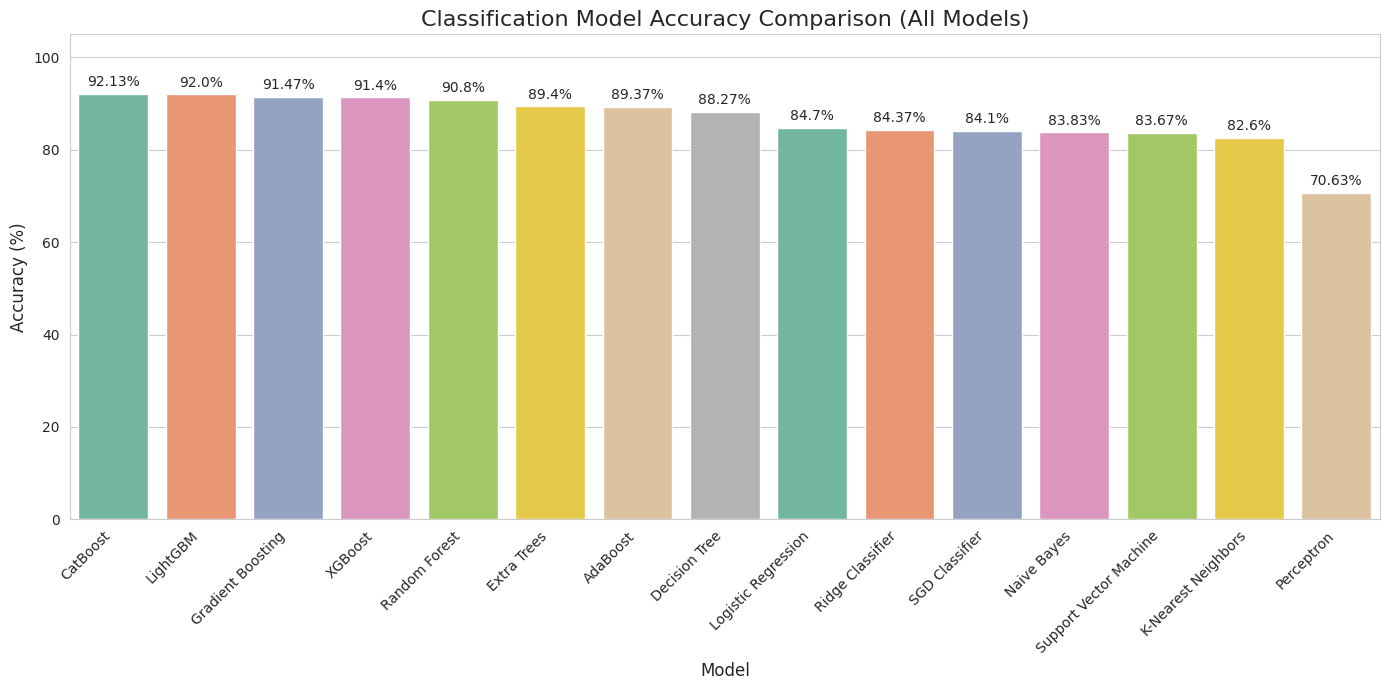

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all models are included
all_models_df = results_df.copy()

# Set a colorful palette
palette = sns.color_palette("Set2", len(all_models_df))

# Plot Accuracy comparison
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=all_models_df, x="Model", y="Accuracy (%)", palette=palette)

# Add accuracy values on top of each bar
for bar, acc in zip(barplot.patches, all_models_df["Accuracy (%)"]):
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width()/2, height + 1, f'{acc}%', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title("Classification Model Accuracy Comparison (All Models)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()


# Hyperparameter Tunning (BayesSearchCV)

In [10]:
!pip install scikit-optimize catboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.9 MB/s eta 0:00:00


In [16]:
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

# Define search space
param_space_lgbm = {
    'num_leaves': (20, 150),            # number of leaves
    'max_depth': (3, 15),               # tree depth
    'learning_rate': (1e-3, 0.3, 'log-uniform'),
    'n_estimators': (100, 1000),        # boosting rounds
    'subsample': (0.5, 1.0, 'uniform'), # bagging fraction
    'colsample_bytree': (0.5, 1.0, 'uniform')
}

# Model
lgbm = LGBMClassifier()

# Bayesian Search
bayes_lgbm = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space_lgbm,
    n_iter=30,         # number of trials (increase for more thorough search)
    cv=3,              # cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=0,
    random_state=42
)

# Fit
bayes_lgbm.fit(X_train, y_train)

print("Best Parameters (LightGBM):", bayes_lgbm.best_params_)
print("Best CV Accuracy (LightGBM):", bayes_lgbm.best_score_)


[LightGBM] [Info] Number of positive: 5997, number of negative: 6003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499750 -> initscore=-0.001000
[LightGBM] [Info] Start training from score -0.001000
Best Parameters (LightGBM): OrderedDict({'colsample_bytree': 1.0, 'learning_rate': 0.0014103880811855041, 'max_depth': 14, 'n_estimators': 584, 'num_leaves': 50, 'subsample': 0.688094002717177})
Best CV Accuracy (LightGBM): 0.9245833333333332


In [13]:
from catboost import CatBoostClassifier

# Define search space
param_space_cat = {
    'depth': (4, 10),                     # tree depth
    'learning_rate': (1e-3, 0.3, 'log-uniform'),
    'iterations': (200, 1000),            # boosting rounds
    'l2_leaf_reg': (1, 10),               # L2 regularization
    'border_count': (32, 255)             # split points for numerical features
}

# Model
cat = CatBoostClassifier(verbose=0)

# Bayesian Search
bayes_cat = BayesSearchCV(
    estimator=cat,
    search_spaces=param_space_cat,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0,
    random_state=42
)

# Fit
bayes_cat.fit(X_train, y_train)

print("Best Parameters (CatBoost):", bayes_cat.best_params_)
print("Best CV Accuracy (CatBoost):", bayes_cat.best_score_)


Best Parameters (CatBoost): OrderedDict({'border_count': 32, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 10, 'learning_rate': 0.018815023577191548})
Best CV Accuracy (CatBoost): 0.9223333333333333


In [32]:
# ------------------- LightGBM -------------------
best_lgbm = bayes_lgbm.best_estimator_

y_pred_lgbm = best_lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

# ------------------- CatBoost -------------------
best_cat = bayes_cat.best_estimator_

y_pred_cat = best_cat.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

# ------------------- Results Table -------------------
results = []

results.append({
    "Model": "LightGBM (BayesSearchCV)",
    "Accuracy (%)": round(acc_lgbm * 100, 2),
    "Precision (%)": round(precision_lgbm * 100, 2),
    "Recall (%)": round(recall_lgbm * 100, 2),
    "F1-Score (%)": round(f1_lgbm * 100, 2),
    "Best Params": bayes_lgbm.best_params_
})

results.append({
    "Model": "CatBoost (BayesSearchCV)",
    "Accuracy (%)": round(acc_cat * 100, 2),
    "Precision (%)": round(precision_cat * 100, 2),
    "Recall (%)": round(recall_cat * 100, 2),
    "F1-Score (%)": round(f1_cat * 100, 2),
    "Best Params": bayes_cat.best_params_
})

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False)
print(results_df)


                      Model  Accuracy (%)  Precision (%)  Recall (%)  \
0  LightGBM (BayesSearchCV)         92.27          90.61       94.34   
1  CatBoost (BayesSearchCV)         92.00          90.40       94.01   

   F1-Score (%)                                        Best Params  
0         92.44  {'colsample_bytree': 1.0, 'learning_rate': 0.0...  
1         92.17  {'border_count': 32, 'depth': 6, 'iterations':...  


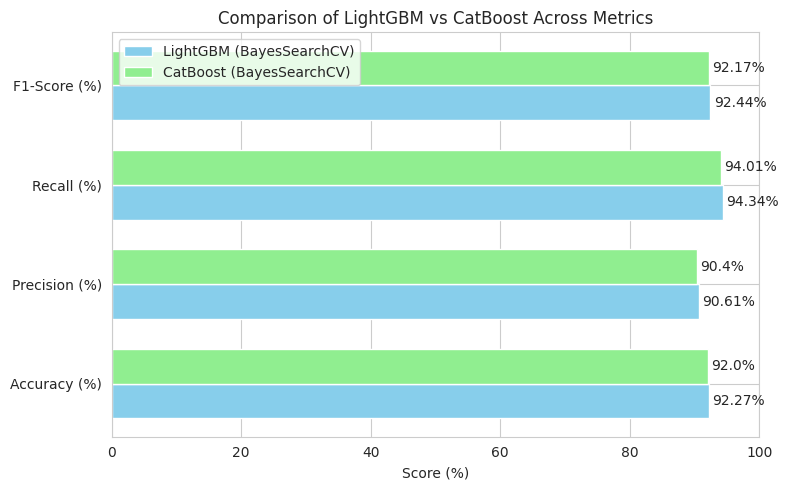

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare data
results = [
    {"Model": "LightGBM (BayesSearchCV)", "Accuracy (%)": round(acc_lgbm*100,2),
     "Precision (%)": round(precision_lgbm*100,2),
     "Recall (%)": round(recall_lgbm*100,2),
     "F1-Score (%)": round(f1_lgbm*100,2)},
    {"Model": "CatBoost (BayesSearchCV)", "Accuracy (%)": round(acc_cat*100,2),
     "Precision (%)": round(precision_cat*100,2),
     "Recall (%)": round(recall_cat*100,2),
     "F1-Score (%)": round(f1_cat*100,2)}
]

df = pd.DataFrame(results)

# Metrics to visualize
metrics = ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)"]
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.barh(x - width/2, df.loc[0, metrics], width, label=df.loc[0,"Model"], color='skyblue')
rects2 = ax.barh(x + width/2, df.loc[1, metrics], width, label=df.loc[1,"Model"], color='lightgreen')

# Add text on bars
for i in range(len(metrics)):
    ax.text(df.loc[0, metrics[i]] + 0.5, i - width/2, f'{df.loc[0, metrics[i]]}%', va='center')
    ax.text(df.loc[1, metrics[i]] + 0.5, i + width/2, f'{df.loc[1, metrics[i]]}%', va='center')

# Labels and title
ax.set_yticks(x)
ax.set_yticklabels(metrics)
ax.set_xlim(0, 100)
ax.set_xlabel('Score (%)')
ax.set_title('Comparison of LightGBM vs CatBoost Across Metrics')
ax.legend()
plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = y_pred_lgbm
y_pred_proba = best_lgbm.predict_proba(X_test)[:, 1]  # probabilities for ROC, PR curves

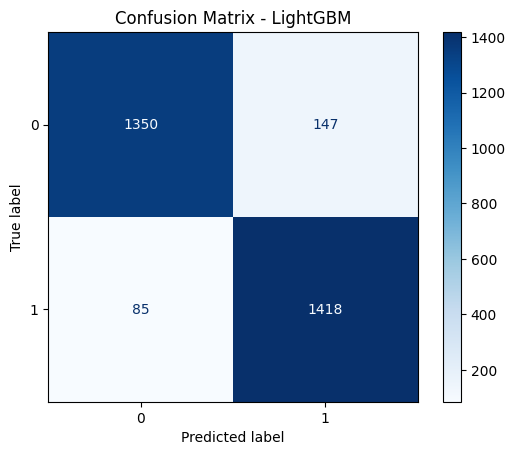

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lgbm.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.show()

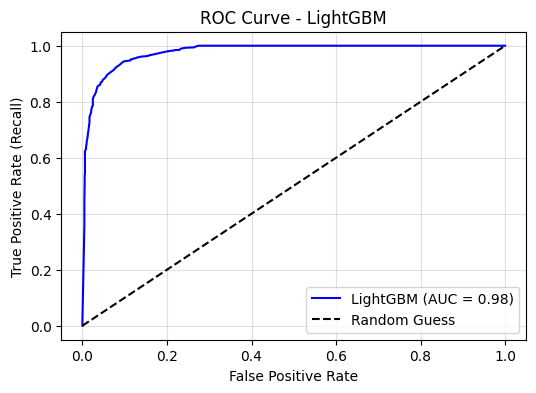

In [19]:
#AUC_ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

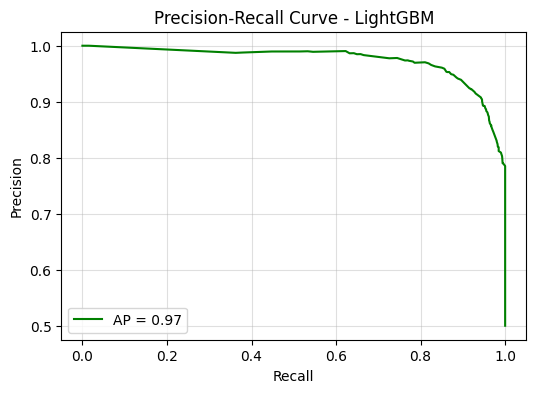

In [20]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)
avg_prec = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label=f"AP = {avg_prec:.2f}", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LightGBM")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

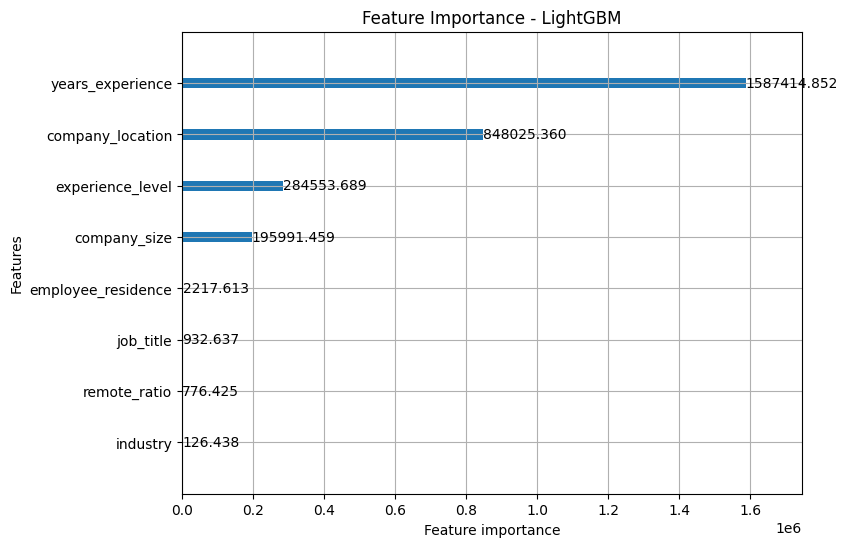

In [21]:
# Feature Importance (LightGBM built-in)
import lightgbm as lgb

lgb.plot_importance(best_lgbm, max_num_features=15, importance_type="gain", figsize=(8, 6))
plt.title("Feature Importance - LightGBM")
plt.show()

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


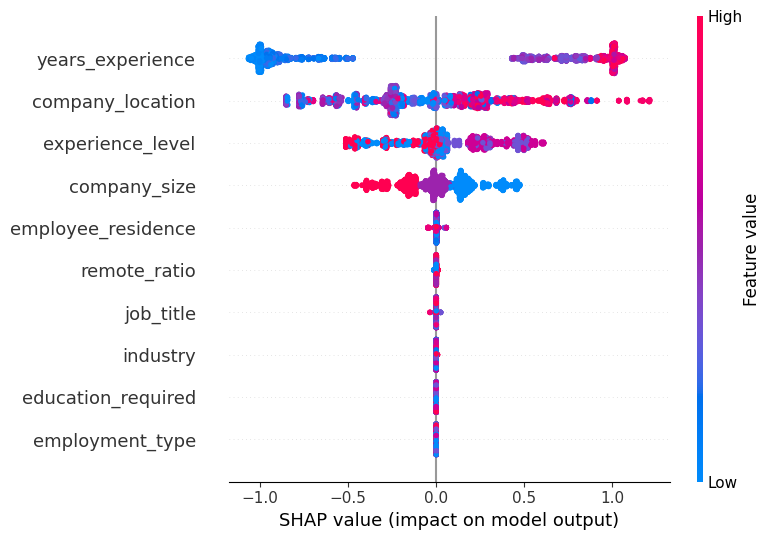

In [23]:
import shap

explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_test)  # returns 2D array for binary

# Summary plot (all features)
shap.summary_plot(shap_values, X_test)

# Force plot (single prediction)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])